In [30]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [31]:
data = pd.read_csv("c:\\Users\\benav\\Downloads\\data_latinoamerica.csv") #se puede de a chunk pero en este momento no es necesario 

In [32]:
data.head()

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
0,AR,2020-01-01,AR,Argentina,3.0,0.0,3.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
1,AR,2020-01-02,AR,Argentina,14.0,0.0,17.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
2,AR,2020-01-03,AR,Argentina,3.0,0.0,20.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
3,AR,2020-01-04,AR,Argentina,7.0,0.0,27.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
4,AR,2020-01-05,AR,Argentina,5.0,0.0,32.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN


In [33]:
# Ver qué valores únicos tiene la columna 'country_name'
print(data["country_name"].unique())


['Argentina' 'Bolivia' 'Brazil' 'Chile' 'Colombia' 'Costa Rica' 'Cuba'
 'Dominican Republic' 'Ecuador' 'Guatemala' 'Honduras' 'Mexico'
 'Nicaragua' 'Panama' 'Peru' 'Puerto Rico' 'Paraguay' 'El Salvador'
 'Uruguay' 'Venezuela']


In [34]:
#cantidad de fila junto la cantidad de columnas
np.shape(data) 

(12216057, 50)

In [35]:
# 2. Leer el archivo readme.txt para revisar las columnas
with open("c:\\Users\\benav\\Downloads\\Readme.txt", encoding="utf-8") as archivo: #abre el archivo leer el caracter "utf-8" es el estándar para texto con acentos, ñ, etc.
    contenido = archivo.read() #Lee todo el contenido del archivo como una sola cadena de texto y lo guarda en la variable contenido
    print(contenido) #lo imprime 


Diccionario de datos




Name
	Type
	Description
	Example
	date
	string
	ISO 8601 date (YYYY-MM-DD) of the datapoint
	3/30/2020
	population
	integer
	Total count of humans
	51606633
	population_male
	integer
	Total count of males
	25846211
	population_female
	integer
	Total count of females
	25760422
	rural_population
	integer
	Population in a rural area
	9568386
	urban_population
	integer
	Population in an urban area
	42038247
	population_density
	double [persons per squared kilometer]
	Population per squared kilometer of land area
	529.3585
	human_development_index
	double [0-1]
	Composite index of life expectancy, education, and per capita income indicators
	0.903
	population_age_00_To_79
	integer
	Estimated population between the ages of ${lower} and ${upper}, both inclusive
	42038247
	population_age_80_and_older
	integer
	Estimated population over the age of 80
	477081
	gdp
	integer [USD]
	Gross domestic product; monetary value of all finished goods and services
	24450604878
	gdp_

In [36]:
#Filtrar países
paises = ["Colombia", "Argentina", "Chile", "Mexico", "Peru", "Brazil"]
data_latinoamerica = data[data["country_name"].isin(paises)]


#verificar si estan los paises filtrados
print(data_latinoamerica["country_name"].value_counts())


country_name
Brazil       5565456
Mexico       2475518
Peru         1883891
Colombia     1145596
Argentina     540095
Chile         359733
Name: count, dtype: int64


In [37]:
#filtrar por fecha a mayor de 2021-01-01
filtrado_fecha = data_latinoamerica[data_latinoamerica["date"] >= "2021-01-01"] 


Eliminar valores vacios pero no NaN solo vacios en filas y columnas

In [38]:
filtrado_fecha = filtrado_fecha.dropna(axis=0,how= "all") #elimina filas(axis=0) completas(how=all) que están vacías.
filtrado_fecha = filtrado_fecha.dropna(axis=1,how= "all") # eliminar columnas(axis=1) completas(how=all) que están vacías. 
data_latinoamerica = data_latinoamerica.dropna(axis=0,how= "all")  #elimina solo lo que este vacio
data_latinoamerica = data_latinoamerica.dropna(axis=1,how= "all")  #elimina solo lo que este vacio

In [39]:
print(data_latinoamerica.columns) # miramos las columnas que tiene para saber cual es importante

Index(['location_key', 'date', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_

In [40]:
print(data_latinoamerica["date"].info()) #imprimir la información sobre la columna de fechas
print(data_latinoamerica["date"].min()) #saber la fecha minima 
print(data_latinoamerica["date"].max()) #saber la fecha mas alta

<class 'pandas.core.series.Series'>
Index: 11970289 entries, 0 to 12136776
Series name: date
Non-Null Count     Dtype 
--------------     ----- 
11970289 non-null  object
dtypes: object(1)
memory usage: 182.7+ MB
None
2020-01-01
2022-09-17


In [41]:
print(data_latinoamerica) #imprime los datos de data_latinoamerica

         location_key        date country_code country_name  new_confirmed  \
0                  AR  2020-01-01           AR    Argentina            3.0   
1                  AR  2020-01-02           AR    Argentina           14.0   
2                  AR  2020-01-03           AR    Argentina            3.0   
3                  AR  2020-01-04           AR    Argentina            7.0   
4                  AR  2020-01-05           AR    Argentina            5.0   
...               ...         ...          ...          ...            ...   
12136772  PE_UCA_0401  2022-09-13           PE         Peru            NaN   
12136773  PE_UCA_0401  2022-09-14           PE         Peru            NaN   
12136774  PE_UCA_0401  2022-09-15           PE         Peru            NaN   
12136775  PE_UCA_0401  2022-09-16           PE         Peru            NaN   
12136776  PE_UCA_0401  2022-09-17           PE         Peru            NaN   

          new_deceased  cumulative_confirmed  cumulative_deceas

In [42]:
data_latinoamerica.isnull().sum() #sumar los valores nulos de data

location_key                                    0
date                                            0
country_code                                    0
country_name                                    0
new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population                                 521266
population_male                           1122803
population_female                         1122803
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
population_age_00_09                      1465689
population_age_10_19                      1465689
population_age_20_29                      1465689
population_age_30_39                      1465689


Eliminar valores NaN

In [43]:
data_latinoamerica_limpio = data_latinoamerica = data_latinoamerica.dropna()  #Elimina todas las filas del DataFrame data_latinoamerica que contengan al menos un valor faltante (NaN).
data_latinoamerica_limpio = data_latinoamerica.dropna(axis=1)  #Guarda el resultado en la variable y lo mismo de arriba pero se aplica a columnas

columnas_importantes = ['new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased'] #define una variable
data_latinoamerica_limpio = data_latinoamerica.dropna(subset=columnas_importantes) ## Eliminamos del DataFrame todas las filas que tengan valores faltantes (NaN) en cualquiera de esas columnas importantes


In [44]:
data_latinoamerica_limpio.isnull().sum() #sumar los valores nulos 


location_key                             0
date                                     0
country_code                             0
country_name                             0
new_confirmed                            0
new_deceased                             0
cumulative_confirmed                     0
cumulative_deceased                      0
cumulative_vaccine_doses_administered    0
population                               0
population_male                          0
population_female                        0
population_rural                         0
population_urban                         0
population_density                       0
human_development_index                  0
population_age_00_09                     0
population_age_10_19                     0
population_age_20_29                     0
population_age_30_39                     0
population_age_40_49                     0
population_age_50_59                     0
population_age_60_69                     0
population_

In [45]:
print(data_latinoamerica_limpio.shape)

(842, 50)


convertir fechas, podrían haberse generado nuevos valores nulos

In [46]:
# Convertir 'date' a tipo datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')  #errors lo convierte Nat si no e puede convertir

# Rellenar valores faltantes con la media de cada columna numérica
data.fillna(data.mean(numeric_only=True), inplace=True) #rellena con el valor medio

# Rellenar valores restantes con datos anteriores o siguientes
data.fillna(method='ffill', inplace=True) #método 'ffill' significa "relleno hacia adelante inplace=True significa que el cambio se realiza directamente sobre el DataFrame
data.fillna(method='bfill', inplace=True)



C:\Users\benav\AppData\Local\Temp\ipykernel_15328\2910513933.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True) #método 'ffill' significa "relleno hacia adelante inplace=True significa que el cambio se realiza directamente sobre el DataFrame
C:\Users\benav\AppData\Local\Temp\ipykernel_15328\2910513933.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


In [47]:
# filtra el dataset para quedarse solo con los datos de los 6 países latinoamericanos objetivo y guarda el resultado en df_export
data_latinoamerica_final =  data_latinoamerica = data[data["country_name"].isin(paises)]

In [48]:
# Verificar los valores únicos en la columna 'location_key' después del filtro
print(data_latinoamerica_final['country_name'].unique())


['Argentina' 'Brazil' 'Chile' 'Colombia' 'Mexico' 'Peru']


In [49]:
print(data_latinoamerica_final.columns) #imprime las columns de data_latinoamerica

Index(['location_key', 'date', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_

verificar que no este numeros negativos

In [56]:
# Columnas numéricas que queremos verificar
columnas_numericas_covid = [
    'new_confirmed', 'new_deceased', 'cumulative_confirmed',
    'cumulative_deceased', 'new_recovered', 'cumulative_recovered',
    'cumulative_vaccine_doses_administered'
]

# Filtrar datos que no tienen valores negativos en esas columnas
data_latinoamerica_limpio = data_latinoamerica_final [
    (data_latinoamerica_final [columnas_numericas_covid] >= 0).all(axis=1)
]

# Verificación: contar cuántos valores negativos quedan por columna
for columna in columnas_numericas_covid:
    negativos = (data_latinoamerica_limpio[columna] < 0).sum()
    print(f"{columna}: {negativos} valores negativos")

new_confirmed: 0 valores negativos
new_deceased: 0 valores negativos
cumulative_confirmed: 0 valores negativos
cumulative_deceased: 0 valores negativos
new_recovered: 0 valores negativos
cumulative_recovered: 0 valores negativos
cumulative_vaccine_doses_administered: 0 valores negativos


In [57]:
# filtra el dataset para quedarse solo con los datos de los 6 países latinoamericanos objetivo y guarda el resultado en data
data_latinoamerica_final =  data_latinoamerica = data[data["country_name"].isin(paises)]
# Verificar los valores únicos en la columna 'location_key' después del filtro
print(data_latinoamerica_final['country_name'].unique())

['Argentina' 'Brazil' 'Chile' 'Colombia' 'Mexico' 'Peru']


Filtrar columnas que necesitamos 

In [59]:
# Paso 1: Definir las columnas de interés
columnas_covid = [
    'location_key', 'date', 'country_code', 'country_name',
    'new_confirmed', 'new_deceased', 'cumulative_confirmed',
    'cumulative_deceased', 'new_recovered', 'cumulative_recovered',
    'cumulative_vaccine_doses_administered'
]

# Paso 2: Verificar que existan en el DataFrame original
columnas_existentes = [col for col in columnas_covid if col in data_latinoamerica_limpio.columns]
columnas_faltantes = [col for col in columnas_covid if col not in data_latinoamerica_limpio.columns]

if columnas_faltantes:
    print("Columnas faltantes:", columnas_faltantes)
else:
    # Paso 3: Filtrar directamente sin copiar todo
    data_latinoamerica_final = data_latinoamerica_limpio[columnas_existentes]
    print(data_latinoamerica_final.head())
    print("Columnas seleccionadas:", data_latinoamerica_final.columns.tolist())


  location_key       date country_code country_name  new_confirmed  \
0           AR 2020-01-01           AR    Argentina            3.0   
1           AR 2020-01-02           AR    Argentina           14.0   
2           AR 2020-01-03           AR    Argentina            3.0   
3           AR 2020-01-04           AR    Argentina            7.0   
4           AR 2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  new_recovered  \
0           0.0                   3.0                  0.0      23.881789   
1           0.0                  17.0                  0.0      23.881789   
2           0.0                  20.0                  0.0      23.881789   
3           0.0                  27.0                  0.0      23.881789   
4           0.0                  32.0                  0.0      23.881789   

   cumulative_recovered  cumulative_vaccine_doses_administered  
0           8822.645593                           1

In [60]:
print(data_latinoamerica_final.isnull().sum())  

location_key                             0
date                                     0
country_code                             0
country_name                             0
new_confirmed                            0
new_deceased                             0
cumulative_confirmed                     0
cumulative_deceased                      0
new_recovered                            0
cumulative_recovered                     0
cumulative_vaccine_doses_administered    0
dtype: int64


exportar archivo real CVS

In [62]:
data_latinoamerica_final.to_csv("CSV\\latam_covid.csv",index=False) #exportar un archivo real CVS

In [63]:
for col in data_latinoamerica_final.select_dtypes(include='number').columns: #pasa por cada pais y cuando pasa por cada pais saca la media,mediana etc.. de todos los países en conjunto  
    print(f"--- {col} ---")                                   #y los ordena por categoria 
    print(f"Media: {data_latinoamerica_final[col].mean()}")
    print(f"Mediana: {data_latinoamerica_final[col].median()}")
    print(f"Máximo: {data_latinoamerica_final[col].max()}")
    print(f"Mínimo: {data_latinoamerica_final[col].min()}")
    print(f"Desviación estándar: {data_latinoamerica_final[col].std()}")
    print()


--- new_confirmed ---
Media: 31.378617261388907
Mediana: 31.95396567948925
Máximo: 298408.0
Mínimo: 0.0
Desviación estándar: 555.0952125184156

--- new_deceased ---
Media: 0.6985705696029375
Mediana: 0.7014179449028117
Máximo: 11447.0
Mínimo: 0.0
Desviación estándar: 12.633385569065696

--- cumulative_confirmed ---
Media: 11760.591426738743
Mediana: 12074.474445586677
Máximo: 34568833.0
Mínimo: 0.0
Desviación estándar: 192907.22087262728

--- cumulative_deceased ---
Media: 327.26520590450576
Mediana: 333.5522347244784
Máximo: 685203.0
Mínimo: 0.0
Desviación estándar: 4981.505473544079

--- new_recovered ---
Media: 23.952909122555013
Mediana: 23.88178918461584
Máximo: 282957.0
Mínimo: 0.0
Desviación estándar: 461.58380544801685

--- cumulative_recovered ---
Media: 8818.565966292002
Mediana: 8822.645593035233
Máximo: 33706231.0
Mínimo: 0.0
Desviación estándar: 163895.306528108

--- cumulative_vaccine_doses_administered ---
Media: 1666930.1961243274
Mediana: 1670412.0400628524
Máximo: 347

¿Qué implican estas métricas y cómo pueden ayudar en el análisis de datos?:Las métricas estadísticas como la media, mediana, máximo, mínimo y desviación estándar permiten entender la distribución y comportamiento general de los datos.

¿Se muestran todas las estadísticas en todas las columnas durante el análisis?:No, no todas las estadísticas se muestran en todas las columnas. Algunas funciones como describe() de pandas solo se aplican automáticamente a columnas numéricas, mientras que las columnas de tipo texto (como nombres de país o fechas) no incluyen medidas como media o desviación estándar.

In [64]:
def estadisticas(columna):
    # Calcula la mediana, varianza y rango de una columna numérica
    mediana = columna.median()    # Mediana
    media = columna.mean()   
    varianza = columna.var()      # Varianza
    rango = columna.max() - columna.min()  # Rango
    return media,mediana, varianza, rango 

# Ejemplo de uso con la columna 'cumulative_deceased' de df_export
muerte_acomulado = data_latinoamerica_final["cumulative_deceased"]  # Usar la columna de muertes acumuladas
media, med, var, ran = estadisticas(muerte_acomulado) # La función devuelve la media, mediana, varianza y rango de la columna y coloca la variable de muerte_acomulado

# muestra la mediana, varianza y rango de la columna 'cumulative_deceased' (muertes acumuladas)
print(f"Mediana de muertes acumuladas: {med}")
print(f"Media de muertes acumuladas: {media}")
print(f"Varianza de muertes acumuladas: {var}")
print(f"Rango de muertes acumuladas: {ran}")


Mediana de muertes acumuladas: 333.5522347244784
Media de muertes acumuladas: 327.26520590450576
Varianza de muertes acumuladas: 24815396.782949615
Rango de muertes acumuladas: 685203.0


¿Qué representa la mediana?: La mediana es el valor central en un conjunto de datos ordenado, lo que la hace menos sensible a los valores atípicos en comparación con la media.

¿Cómo varía la dispersión de los datos en el conjunto de datos analizado, en términos de la varianza y el rango?: La varianza muestra cuánto se dispersan los datos respecto a la media, y el rango muestra la diferencia entre el valor máximo y el mínimo, ambos indicadores de dispersión.

¿Qué nos puede indicar esto sobre la consistencia o la variabilidad de los datos en relación con la mediana?: La varianza y el rango nos indican cuán consistentes o variables son los datos. Si son altos, puede indicar gran dispersión respecto a la mediana.



AVANZE 2 S



In [65]:

# Agrupar por país y luego aplicar las estadísticas generales
estadisticas_por_pais = data_latinoamerica_final.groupby('country_name')[[
    'new_confirmed', 'new_deceased', 'cumulative_confirmed',
    'cumulative_deceased', 'cumulative_vaccine_doses_administered'
]].agg(['mean', 'median', 'std', 'min', 'max'])

# Mostrar las estadísticas por país
print(estadisticas_por_pais)

# Solo columnas numéricas relevantes
cols_corr = [
    'new_confirmed', 'new_deceased', 'cumulative_confirmed',
    'cumulative_deceased'
]

# Correlación para países seleccionados
corr_matrix = data_latinoamerica_final[cols_corr].corr()
print(corr_matrix)



             new_confirmed                                         \
                      mean     median          std  min       max   
country_name                                                        
Argentina        61.089916  15.000000  1012.457726  0.0  174174.0   
Brazil           23.000737   0.000000   699.601505  0.0  298408.0   
Chile            60.662841  31.953966   423.866793  0.0   38446.0   
Colombia         38.032037  31.953966   331.886196  0.0   40415.0   
Mexico           35.358398  31.953966   254.194176  0.0   81002.0   
Peru             32.441503  31.953966   195.258061  0.0   58128.0   

             new_deceased                                     ...  \
                     mean    median        std  min      max  ...   
country_name                                                  ...   
Argentina        0.928384  0.000000   9.748400  0.0    656.0  ...   
Brazil           0.480587  0.000000  15.111551  0.0   4249.0  ...   
Chile            1.061921  0.7014

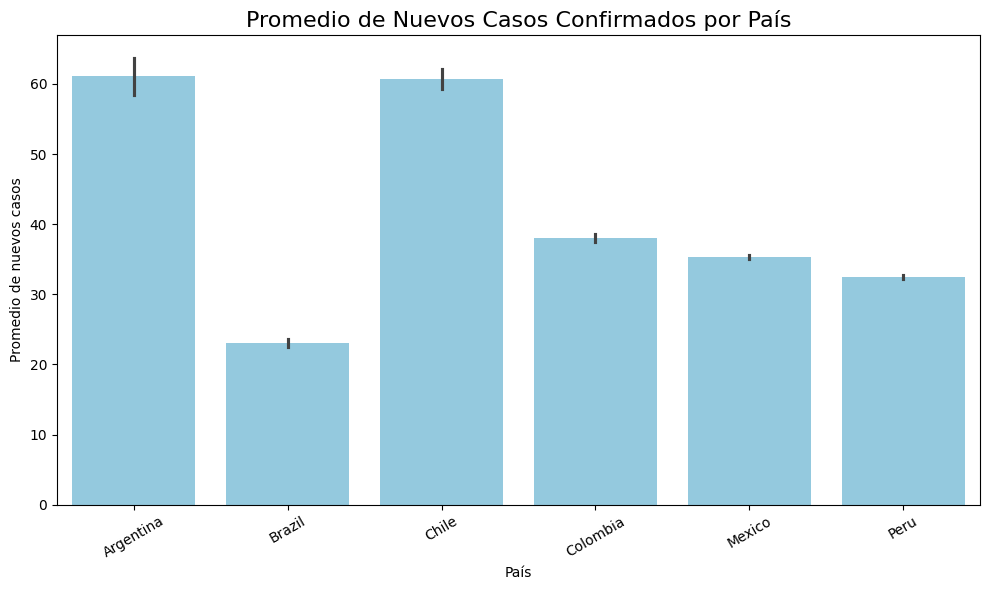

In [67]:

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='country_name', y='new_confirmed', data=data_latinoamerica_final, color='skyblue')

# Etiquetas y título
plt.title('Promedio de Nuevos Casos Confirmados por País', fontsize=16)
plt.xlabel('País')
plt.ylabel('Promedio de nuevos casos')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


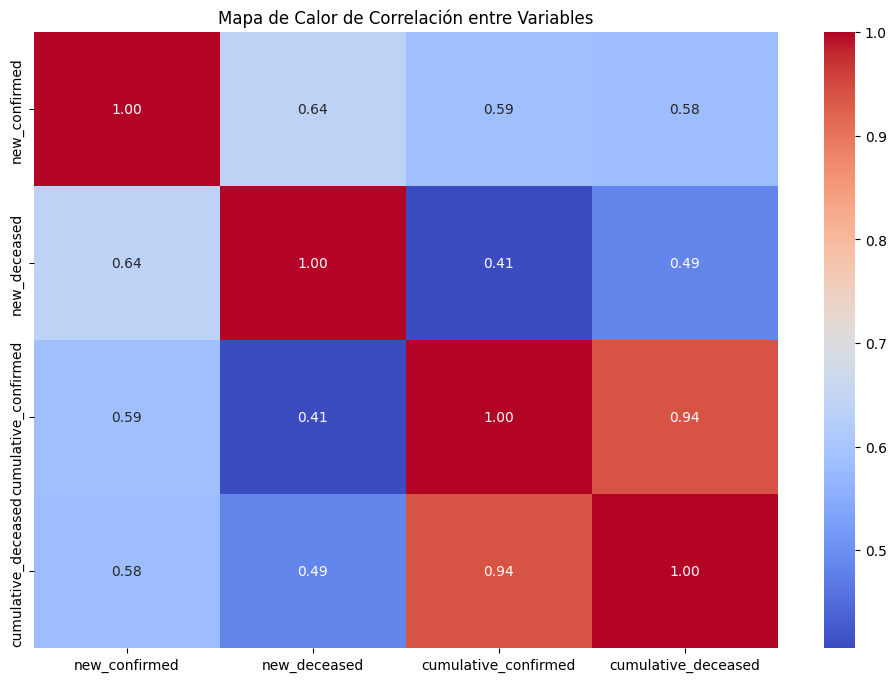

In [68]:
#Mapa de calor de correlación entre variables 
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación entre Variables')
plt.show()


MemoryError: Unable to allocate 272. MiB for an array with shape (11895834, 3) and data type float64

Error in callback <function _draw_all_if_interactive at 0x000002448C9742C0> (for post_execute), with arguments args (),kwargs {}:


MemoryError: Unable to allocate 272. MiB for an array with shape (11895834, 3) and data type float64

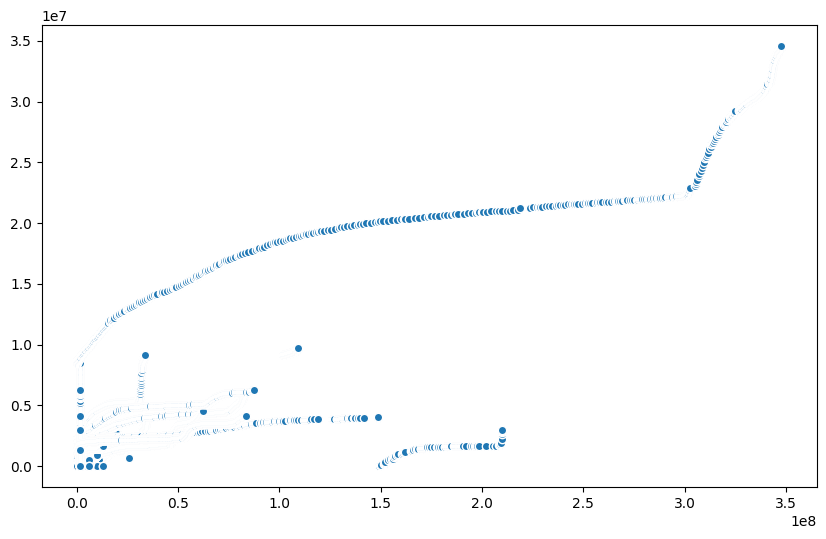

In [69]:
#Histograma y densidad de nuevos casos por país
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=data_latinoamerica_final,
    x='cumulative_vaccine_doses_administered',
    y='cumulative_confirmed',
    hue='country_name'
)
plt.title('Relación entre Vacunación y Casos Confirmados')
plt.xlabel('Dosis de Vacunas Administradas')
plt.ylabel('Casos Confirmados')
plt.legend()
plt.show()

# permite ver si la cantidad de vacunas administradas en un país tiene alguna relación con la cantidad de casos confirmados como brazil
#Más casos confirmados acumulados (está más alto en el eje Y).
#Más vacunas aplicadas (está más a la derecha en el eje X).


Avanze 3 (las trasformaciones y trasforma Y ELIMINAR DATOS NaN ya en el avanze 1)

In [ ]:
#verificar si tengo valores nulos 
print(data_latinoamerica_final.isnull().sum())
print(data_latinoamerica_final.isnull().values.any())

location_key                             0
date                                     0
country_code                             0
country_name                             0
new_confirmed                            0
new_deceased                             0
cumulative_confirmed                     0
cumulative_deceased                      0
cumulative_vaccine_doses_administered    0
population                               0
population_male                          0
population_female                        0
population_rural                         0
population_urban                         0
population_density                       0
human_development_index                  0
population_age_00_09                     0
population_age_10_19                     0
population_age_20_29                     0
population_age_30_39                     0
population_age_40_49                     0
population_age_50_59                     0
population_age_60_69                     0
population_

In [ ]:
# agrupamos y con last seleccionamos el ultimo valor 
tabla_resultado = data_latinoamerica_final.groupby("country_name").agg({
    "cumulative_confirmed": "last",   # Último dato de casos confirmados acumulados
    "cumulative_recovered": "last"    # Último dato de recuperados acumulados
}).reset_index()  # crea un índice (0,1,2,3)

# Mostramos la tabla con los resultados
print(tabla_resultado)


  country_name  cumulative_confirmed  cumulative_recovered
0    Argentina          12074.474446           8822.645593
1       Brazil          12074.474446           8822.645593
2        Chile          12074.474446           8822.645593
3     Colombia          12074.474446           8822.645593
4       Mexico          12074.474446           8822.645593
5         Peru          12074.474446           8822.645593


C:\Users\benav\AppData\Local\Temp\ipykernel_2700\2309889488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_final["casos_activos_estimados"] = (


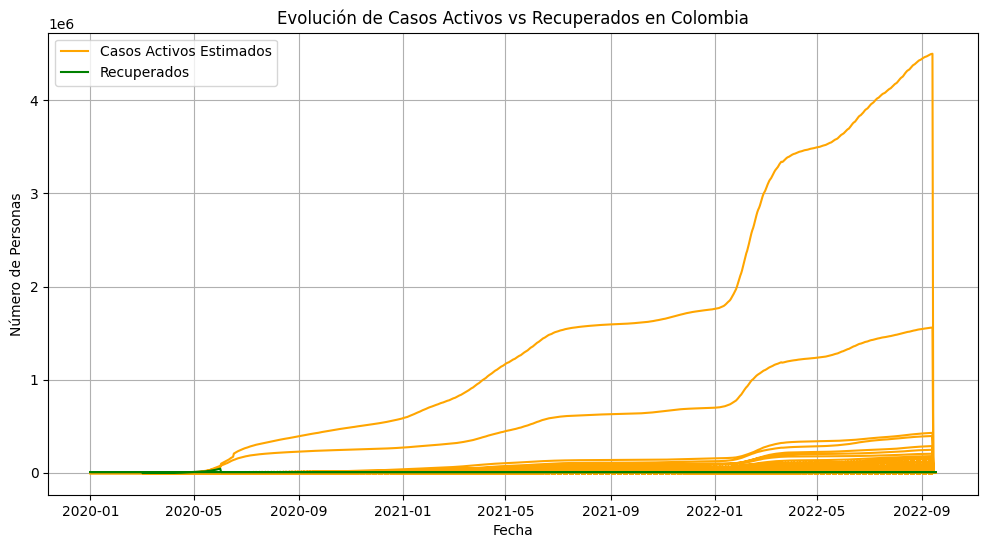

In [ ]:
#Casos activos estimados vs recuperados grafico linea
data_latinoamerica_final["casos_activos_estimados"] = (
    data_latinoamerica_final["cumulative_confirmed"] 
    - data_latinoamerica_final["cumulative_recovered"]
    - data_latinoamerica_final["cumulative_deceased"]
)

chile = data_latinoamerica_final[data_latinoamerica_final["country_name"] == "Chile"]

plt.figure(figsize=(12, 6))
plt.plot(chile["date"], chile["casos_activos_estimados"], label="Casos Activos Estimados", color="orange")
plt.plot(chile["date"], chile["cumulative_recovered"], label="Recuperados", color="green")
plt.title("Evolución de Casos Activos vs Recuperados en Colombia")
plt.xlabel("Fecha")
plt.ylabel("Número de Personas")
plt.legend()
plt.grid(True)
plt.show()

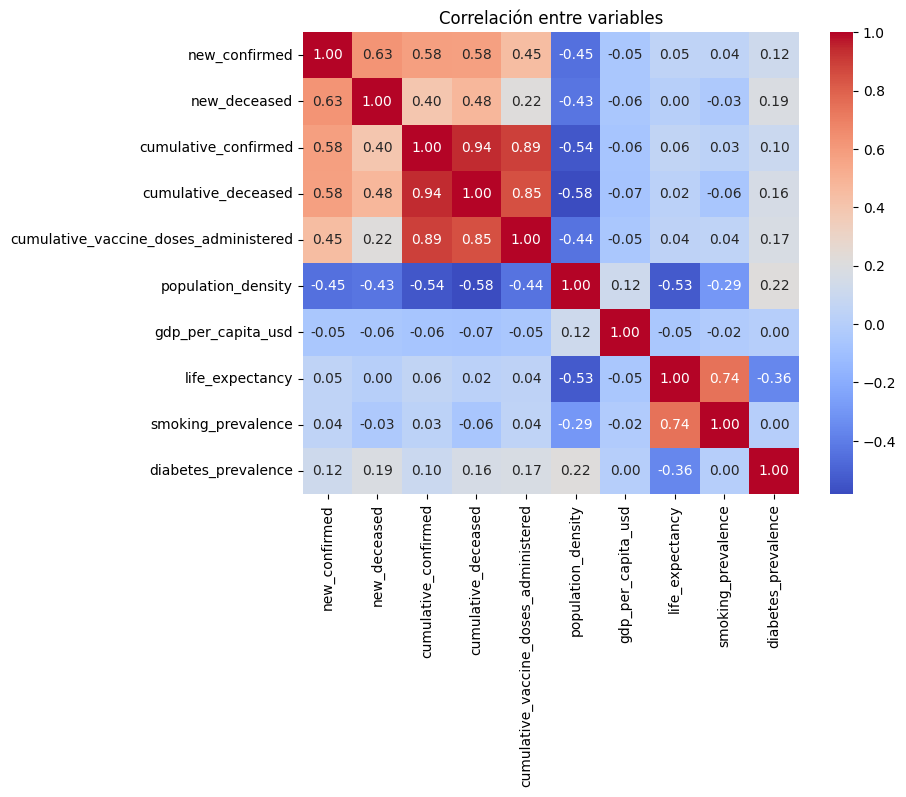

In [ ]:
#mapa de calor
corr = [
    'new_confirmed', 'new_deceased', 'cumulative_confirmed',
    'cumulative_deceased', 'cumulative_vaccine_doses_administered',
    'population_density', 'gdp_per_capita_usd',
    'life_expectancy', 'smoking_prevalence', 'diabetes_prevalence'
]

# Correlación para países seleccionados
corr = data_latinoamerica_final[corr].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlación entre variables")
plt.show()


In [ ]:
#PRUEBA
media_casos = data_latinoamerica_final["new_confirmed"].mean()
print(media_casos)

31.08101075011777


In [ ]:
# Calcular la media de los nuevos casos
media_casos = data_latinoamerica_final["new_confirmed"].mean() #mean media suma todo y lo divide
print("Promedio de nuevos casos:", media_casos)

# Función para clasificar los nuevos casos con base en el promedio
def clasificar_nuevos_casos(valor):
    if valor > media_casos:
        return "Alto"  # Si el valor es mayor que la media
    else:
        return "Bajo"  # Si el valor es menor o igual a la media

# Aplicar la función a la columna 'new_confirmed' y crear la nueva columna 'clasificacion_nuevos_casos'
data_latinoamerica_final.loc[:, "clasificacion_nuevos_casos"] = data_latinoamerica_final["new_confirmed"].apply(clasificar_nuevos_casos) #UTILIZANDO APPLY añade la funcion

# Ver los resultados
print(data_latinoamerica_final[["new_confirmed", "clasificacion_nuevos_casos"]].head(20))


Promedio de nuevos casos: 31.08101075011777


C:\Users\benav\AppData\Local\Temp\ipykernel_2700\708043754.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_final.loc[:, "clasificacion_nuevos_casos"] = data_latinoamerica_final["new_confirmed"].apply(clasificar_nuevos_casos) #UTILIZANDO APPLY añade la funcion


    new_confirmed clasificacion_nuevos_casos
0             3.0                       Bajo
1            14.0                       Bajo
2             3.0                       Bajo
3             7.0                       Bajo
4             5.0                       Bajo
5             9.0                       Bajo
6             4.0                       Bajo
7             3.0                       Bajo
8             0.0                       Bajo
9             1.0                       Bajo
10            0.0                       Bajo
11            1.0                       Bajo
12            0.0                       Bajo
13            0.0                       Bajo
14            2.0                       Bajo
15            0.0                       Bajo
16            2.0                       Bajo
17            1.0                       Bajo
18           10.0                       Bajo
19            1.0                       Bajo


In [ ]:
#FILTRAR LOS CASOS ALTOS SOLAMENTE
alta_clasificacion = data_latinoamerica_final[data_latinoamerica_final["clasificacion_nuevos_casos"] == "Alto"]
# Mostrar las primeras 20 filas de los resultados filtrados
print(alta_clasificacion[["new_confirmed", "clasificacion_nuevos_casos"]].head(20))

    new_confirmed clasificacion_nuevos_casos
80           62.0                       Alto
81           54.0                       Alto
82           33.0                       Alto
83          105.0                       Alto
84          116.0                       Alto
85          110.0                       Alto
86           82.0                       Alto
87           69.0                       Alto
88          109.0                       Alto
89           84.0                       Alto
90           90.0                       Alto
91          121.0                       Alto
92          144.0                       Alto
93          107.0                       Alto
94          105.0                       Alto
95           72.0                       Alto
96          105.0                       Alto
97           76.0                       Alto
98          102.0                       Alto
99          100.0                       Alto


In [ ]:
print(data_latinoamerica_final.isnull().sum())  


location_key                             0
date                                     0
country_code                             0
country_name                             0
new_confirmed                            0
new_deceased                             0
cumulative_confirmed                     0
cumulative_deceased                      0
cumulative_vaccine_doses_administered    0
population                               0
population_male                          0
population_female                        0
population_rural                         0
population_urban                         0
population_density                       0
human_development_index                  0
population_age_00_09                     0
population_age_10_19                     0
population_age_20_29                     0
population_age_30_39                     0
population_age_40_49                     0
population_age_50_59                     0
population_age_60_69                     0
population_

In [ ]:
print(data_latinoamerica_final)

         location_key       date country_code country_name  new_confirmed  \
0                  AR 2020-01-01           AR    Argentina       3.000000   
1                  AR 2020-01-02           AR    Argentina      14.000000   
2                  AR 2020-01-03           AR    Argentina       3.000000   
3                  AR 2020-01-04           AR    Argentina       7.000000   
4                  AR 2020-01-05           AR    Argentina       5.000000   
...               ...        ...          ...          ...            ...   
12136772  PE_UCA_0401 2022-09-13           PE         Peru      31.953966   
12136773  PE_UCA_0401 2022-09-14           PE         Peru      31.953966   
12136774  PE_UCA_0401 2022-09-15           PE         Peru      31.953966   
12136775  PE_UCA_0401 2022-09-16           PE         Peru      31.953966   
12136776  PE_UCA_0401 2022-09-17           PE         Peru      31.953966   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
0     

In [ ]:
print(data_latinoamerica_final["country_name"].value_counts())

country_name
Brazil       5565456
Mexico       2475518
Peru         1883891
Colombia     1145596
Argentina     540095
Chile         359733
Name: count, dtype: int64
